In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *
init_printing()

i, j, k, l, m, N = symbols(' i j k l m N')
dT = symbols('\Delta{T}')

# Random walk in Phase

We begin with the simplest case of a randown walk in the phase
\begin{align}
\Delta \phi_{i} = \sum_{j=1}{i}\delta \phi_{j}
\end{align}

## Extending to mismatch
We now want to attempt to extend the Random walk to quantities in the mismatch. 
The simplests case is the phase random walk for which we have no effect on higher
order terms. We have not minised with respect to the mismatch but to the square
sum but they should'nt be too different..hopefully. 


## 0th order for phase

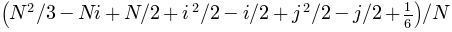

In [2]:
C_tilde_ik_k0 = N**-1
C_tilde_jl_k0 = N**-1

def Expectation_ij_k0(Eij, Eji):
    """ Returns k0 fitted expression in terms of i, j

    Note it is only the numeric part e.g we drop the sigma so for a 
    pure random walk. Eij = j
    
    """
    Ekj = Eij.subs(i, k) # j
    Ejk = Eji.subs(i, k) # k
    Eil = Eij.subs(j, l) # l
    Eli = Eji.subs(j, l) # i
    Ekl = Eij.subs(i, k).subs(j, l) # l
    Elk = Eji.subs(i, k).subs(j, l) # k
    
    return (Eij - 
          (summation(C_tilde_ik_k0 * Ejk, (k, 1, j-1)) + 
           summation(C_tilde_ik_k0 * Ekj, (k, j, N)) +
           summation(C_tilde_jl_k0 * Eil, (l, 1, i-1)) +
           summation(C_tilde_jl_k0 * Eli, (l, i, N))) + 
           summation(
               summation(C_tilde_ik_k0*C_tilde_jl_k0 * Ekl, (l , 1, k-1)) + 
               summation(C_tilde_ik_k0*C_tilde_jl_k0 * Elk, (l , k, N)), (k, 1, N))
           )

Exp_dP0idP0j_k0 = Expectation_ij_k0(j, i)
Exp_dP0idP0j_k0 = Exp_dP0idP0j_k0.simplify()
Exp_dP0idP0j_k0

In [3]:
Exp_dP0i2_k0 = Exp_dP0idP0j_k0.subs(j, i).simplify()
SUM_Exp_dP0i2_k0 = summation(Exp_dP0i2_k0, (i, 1, N)).simplify()
SUM_Exp_dP0i2_k0

In [4]:
SUM_Exp_dP0idP0j_k0 = summation(Exp_dP0idP0j_k0, (j, 1, i-1), (i, 1, N)).simplify()
SUM_Exp_dP0idP0j_k0

In [5]:
Ninv = 1/N

gE00 = (Ninv) - (Ninv)**2
gNE00 = - (Ninv)**2

E_m = (gE00 * SUM_Exp_dP0i2_k0 + 2 * gNE00 * SUM_Exp_dP0idP0j_k0).simplify()
E_m

## First order phase

In [6]:
xTx1 = Matrix([[N, summation(i*dT, (i, 1, N))],
              [summation((i*dT), (i, 1, N)), summation((i*dT)**2, (i, 1, N)), ]
              ])

C1 = (simplify(xTx1)).inv().simplify()

C1_tilde_ik = (C1[0, 0] + 
              C1[1, 0] * dT * (i + k) + 
              C1[1, 1] * dT**2 * i * k 
              )

C1_tilde_jl = C1_tilde_ik .subs(i, j).subs(k, l)

Exp_dP0idP0j_k1 = (j - (summation(C1_tilde_ik * k, (k, 1, j)) + summation(C1_tilde_ik * j, (k, j+1, N)) +
                       summation(C1_tilde_jl * l, (l, 1, i)) + summation(C1_tilde_jl * i, (l, i+1, N)))
              + summation(
                    summation(C1_tilde_ik*C1_tilde_jl * l, (l, 1, k)) 
                    + summation(C1_tilde_ik*C1_tilde_jl * k, (l, k+1, N)),
                    (k, 1, N)))

Exp_dP0idP0j_k1 = Exp_dP0idP0j_k1.simplify()
Exp_dP0idP0j_k1
Exp_dP0i2_k1 = Exp_dP0idP0j_k1.subs(j, i).simplify()
SUM_Exp_dP0i2_k1 = summation(Exp_dP0i2_k1, (i, 1, N)).simplify()
SUM_Exp_dP0i2_k1
SUM_Exp_dP0idP0j_k1 = summation(Exp_dP0idP0j_k1, (j, 1, i-1), (i, 1, N)).simplify()
SUM_Exp_dP0idP0j_k1
Ninv = 1/N

gE00 = (Ninv) - (Ninv)**2
gNE00 = - (Ninv)**2

E_m = (gE00 * SUM_Exp_dP0i2_k1 + 2 * gNE00 * SUM_Exp_dP0idP0j_k1).simplify()
E_m

## Second order fitting 

In [9]:
def Expectation_ij_k2(Eij, Eji, A=2, B=2):
    """ Returns k2 fitted expression in terms of i, j

    Note it is only the numeric part e.g we drop the sigma so for a 
    pure random walk. Eij = j
    
    A = 1, 2 
    B = 1, 2 (fitting orders of the two E)
    
    """
    Ekj = Eij.subs(i, k) # j
    Ejk = Eji.subs(i, k) # k
    Eil = Eij.subs(j, l) # l
    Eli = Eji.subs(j, l) # i
    Ekl = Eij.subs(i, k).subs(j, l) # l
    Elk = Eji.subs(i, k).subs(j, l) # k
    
    CA_tilde_ik = [C1_tilde_ik, C2_tilde_ik][A-1] # Python is zero based
    CB_tilde_jl = [C1_tilde_jl, C2_tilde_jl][B-1]
    
    return (Eij - 
          (summation(CA_tilde_ik * Ejk, (k, 1, j)) + 
           summation(CA_tilde_ik * Ekj, (k, j+1, N)) +
           summation(CB_tilde_jl * Eil, (l, 1, i)) +
           summation(CB_tilde_jl * Eli, (l, i+1, N))) + 
           summation(
               summation(CA_tilde_ik*CB_tilde_jl * Ekl, (l , 1, k)) + 
               summation(CA_tilde_ik*CB_tilde_jl * Elk, (l , k+1, N)), (k, 1, N))
           )

xTx2 = Matrix([[N, summation(i*dT, (i, 1, N)), summation((i*dT)**2, (i, 1, N))],
              [summation((i*dT), (i, 1, N)), summation((i*dT)**2, (i, 1, N)), summation((i*dT)**3, (i, 1, N))],
              [summation((i*dT)**2, (i, 1, N)), summation((i*dT)**3, (i, 1, N)), summation((i*dT)**4, (i, 1, N))]
              ])

C2 = (simplify(xTx2)).inv().simplify()
D2 = Matrix(np.zeros((3, 3)))

for L in range(3):
    for M in range(3):
        c2 = C2[L, M]
        D2[L, M] = c2.factor()
        
C2 = D2
C2_tilde_ik = (C2[0, 0] + 
              C2[1, 0] * dT * (i + k) + 
              C2[0, 2] * dT**2 * (i**2 + k**2) + 
              C2[1, 2] * dT**3 * (i*k**2 + i**2 * k) + 
              C2[1, 1] * dT**2 * i * k + 
              C2[2, 2] * dT**4 * (i*k)**2)

C2_tilde_jl = C2_tilde_ik .subs(i, j).subs(k, l)

## RW in phase

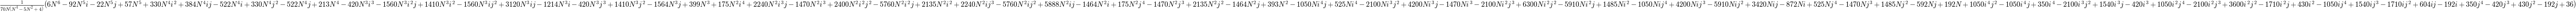

In [10]:
Exp_dP0idP0j_k2 = Expectation_ij_k2(j, i)
Exp_dP0idP0j_k2 = Exp_dP0idP0j_k2.simplify()
Exp_dP0idP0j_k2

In [11]:
Exp_dP0i2_k2 = Exp_dP0idP0j_k2.subs(j, i).simplify()
SUM_Exp_dP0i2_k2 = summation(Exp_dP0i2_k2, (i, 1, N)).simplify()
SUM_Exp_dP0i2_k2

In [12]:
SUM_Exp_dP0idP0j_k2 = summation(Exp_dP0idP0j_k2, (j, 1, i-1), (i, 1, N)).simplify()
SUM_Exp_dP0idP0j_k2

In [13]:
Ninv = 1/N

gE00 = (Ninv) - (Ninv)**2
gNE00 = - (Ninv)**2

E_m = (gE00 * SUM_Exp_dP0i2_k2 + 2 * gNE00 * SUM_Exp_dP0idP0j_k2).simplify()
E_m

In [14]:
print_python(E_m)

N = Symbol('N')
e = 3*(N**2 - 9)/(70*N)


## RW in Frequency

In [15]:
# i > j
E_dF0idF0j_ij = j
E_dP0idP0j_ij = (2 * pi * dT)**2 * (summation((i-k)*(j-k), (k, 1, j)))
E_dP0idF0j_ij = 2 * pi * dT * summation(i-k, (k, 1, j))
E_dP0jdF0i_ij = 2 * pi * dT * summation(j-k, (k, 1, j))

# j > i
E_dF0idF0j_ji = i
E_dP0idP0j_ji = (2 * pi * dT)**2 * (summation((j-k)*(i-k), (k, 1, i)))
E_dP0idF0j_ji = 2 * pi * dT * summation(i-k, (k, 1, i))
E_dP0jdF0i_ji = 2 * pi * dT * summation(j-k, (k, 1, i))

E_dF0idF0j_k2 = Expectation_ij_k2(E_dF0idF0j_ij, E_dF0idF0j_ji, A=1, B=1).simplify()
E_dP0idP0j_k2 = Expectation_ij_k2(E_dP0idP0j_ij, E_dP0idP0j_ji, A=2, B=2).simplify()
E_dP0idF0j_k2 = Expectation_ij_k2(E_dP0idF0j_ij, E_dP0idF0j_ji, A=1, B=2).simplify()
E_dP0jdF0i_k2 = Expectation_ij_k2(E_dP0jdF0i_ij, E_dP0jdF0i_ji, A=2, B=1).simplify()

In [16]:
Ninv = 1/N

gE00 = (Ninv) - (Ninv)**2
gE01 = pi * dT * (Ninv - Ninv**2)
gE10 = gE01
gE11 = nsimplify((pi * dT) **2 * ((4.0/3.0) * Ninv - Ninv**2))

gNE00 = - (Ninv)**2
gNE01 = - pi * dT * (Ninv**2)
gNE10 = gNE01
gNE11 = - nsimplify((pi * dT) **2 * (Ninv**2))

E_dF0idF0i_k2 = E_dF0idF0j_k2.subs(j, i).simplify()
E_dP0idP0i_k2 = E_dP0idP0j_k2.subs(j, i).simplify()
E_dP0idF0i_k2 = E_dP0idF0j_k2.subs(j, i).simplify()

TERM1 = (gE00 * summation(E_dP0idP0i_k2, (i, 1, N))).simplify()
TERM2 = (2 * gE01 * summation(E_dP0idF0i_k2, (i, 1, N))).simplify() 
TERM3 = (gE11 * summation(E_dF0idF0i_k2 , (i, 1, N))).simplify()

TERM4 = (gNE00 * summation(E_dP0idP0j_k2, (j, 1, i-1), (i, 1, N))).simplify()
TERM5 = (gNE11 * summation(E_dF0idF0j_k2, (j, 1, i-1), (i, 1, N)) ).simplify()
TERM6 = (gNE01 * summation(E_dP0idF0j_k2, (j, 1, i-1), (i, 1, N))).simplify()
TERM7 = (gNE10 * summation(E_dP0jdF0i_k2, (j, 1, i-1), (i, 1, N))).simplify()

E_m = TERM1 + TERM2 + TERM3 + 2 * (TERM4 + TERM5 + TERM6 + TERM7)
E_m = E_m.simplify()
E_m

In [17]:
print_python(E_m)

\Delta{T} = Symbol('\Delta{T}')
N = Symbol('N')
e = pi**2*\Delta{T}**2*(N**4 + 13*N**2 + 82)/(630*N)


In [18]:
print latex(E_m)

\frac{\pi^{2} \Delta{T}^{2}}{630 N} \left(N^{4} + 13 N^{2} + 82\right)


In [19]:
((TERM1.expand().collect(N, evaluate=False))[N] 
 + (TERM2.expand().collect(N, evaluate=False))[N] 
 + (TERM3.expand().collect(N, evaluate=False))[N] 
 #+ 2 * (TERM4.expand().collect(N, evaluate=False))[N] 
 #+ 2 * (TERM5.expand().collect(N, evaluate=False))[N] 
 + (TERM6.expand().collect(N, evaluate=False))[N]
 )

KeyError: N

In [ ]:
(TERM2.expand().collect(N, evaluate=False))[N]

In [ ]:
E_dF0idF0j_k2

## 0th order for Frequency

In [ ]:
# i > j
E_dF0idF0j_ij = j
E_dP0idP0j_ij = (2 * pi * dT)**2 * (summation((i-k)*(j-k), (k, 1, j)))
E_dP0idF0j_ij = 2 * pi * dT * summation(i-k, (k, 1, j))
E_dP0jdF0i_ij = 2 * pi * dT * summation(j-k, (k, 1, j))

# j > i
E_dF0idF0j_ji = i
E_dP0idP0j_ji = (2 * pi * dT)**2 * (summation((j-k)*(i-k), (k, 1, i)))
E_dP0idF0j_ji = 2 * pi * dT * summation(i-k, (k, 1, i))
E_dP0jdF0i_ji = 2 * pi * dT * summation(j-k, (k, 1, i))

E_dF0idF0j_k0 = Expectation_ij_k0(E_dF0idF0j_ij, E_dF0idF0j_ji).simplify()
E_dP0idP0j_k0 = Expectation_ij_k0(E_dP0idP0j_ij, E_dP0idP0j_ji).simplify()
E_dP0idF0j_k0 = Expectation_ij_k0(E_dP0idF0j_ij, E_dP0idF0j_ji).simplify()
E_dP0jdF0i_k0 = Expectation_ij_k0(E_dP0jdF0i_ij, E_dP0jdF0i_ji).simplify()


In [ ]:
E_dF0idF0i_k0 = E_dF0idF0j_k0.subs(j, i).simplify()
E_dP0idP0i_k0 = E_dP0idP0j_k0.subs(j, i).simplify()
E_dP0idF0i_k0 = E_dP0idF0j_k0.subs(j, i).simplify()

TERM1 = (gE00 * summation(E_dP0idP0i_k0, (i, 1, N))).simplify()
TERM2 = (2 * gE01 * summation(E_dP0idF0i_k0, (i, 1, N))).simplify() 
TERM3 = (gE11 * summation(E_dF0idF0i_k0 , (i, 1, N))).simplify()

TERM4 = (gNE00 * summation(E_dP0idP0j_k0, (j, 1, i-1), (i, 1, N))).simplify()
TERM5 = (gNE11 * summation(E_dF0idF0j_k0, (j, 1, i-1), (i, 1, N)) ).simplify()
TERM6 = (gNE01 * summation(E_dP0idF0j_k0, (j, 1, i-1), (i, 1, N))).simplify()
TERM7 = (gNE10 * summation(E_dP0jdF0i_k0, (j, 1, i-1), (i, 1, N))).simplify()

E_m = TERM1 + TERM2 + TERM3 + 2 * (TERM4 + TERM5 + TERM6 + TERM7)
E_m = E_m.simplify()
E_m

In [ ]:
E_m